<a href="https://colab.research.google.com/github/SahilKadaskar/AAI/blob/main/BFSDFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BFS Path: ['A', 'B', 'D', 'G']
BFS Visited Nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
DFS Path: ['A', 'C', 'F', 'G']
DFS Visited Nodes: ['A', 'C', 'F', 'G']
BFS Path Length: 4
DFS Path Length: 4
BFS and DFS found paths of the same length


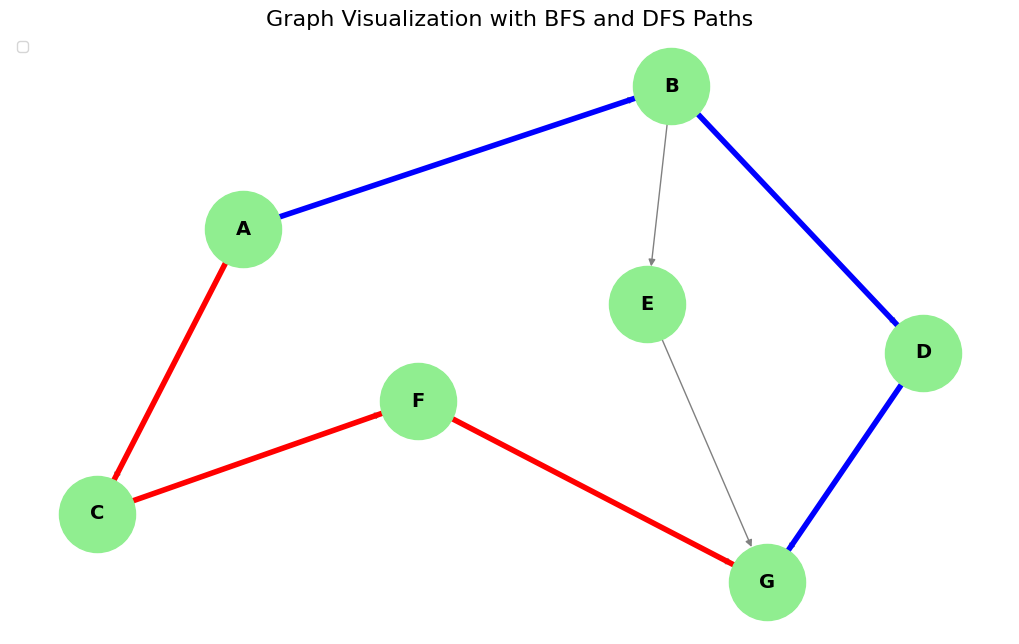

In [3]:
import collections
import networkx as nx
import matplotlib.pyplot as plt

def breadth_first_search(graph, start, goal):
    queue = collections.deque([(start, [start])])
    visited = set()
    visited_nodes = []  # To store visited nodes

    while queue:
        (vertex, path) = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            visited_nodes.append(vertex)  # Add visited node
            if vertex == goal:
                return path, visited_nodes
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
    return None, visited_nodes  # No path found

def depth_first_search(graph, start, goal):
    stack = [(start, [start])]
    visited = set()
    visited_nodes = []  # To store visited nodes

    while stack:
        (vertex, path) = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            visited_nodes.append(vertex)  # Add visited node
            if vertex == goal:
                return path, visited_nodes
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))

    return None, visited_nodes  # No path found

# Visualization function with updated color and node sizes
def visualize_graph(graph, bfs_path=None, dfs_path=None):
    G = nx.DiGraph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    # Draw the graph with custom colors and styles
    node_color = "lightgreen"  # Custom node color
    edge_color = "gray"  # Default edge color for non-path edges
    nx.draw(G, pos, with_labels=True, node_color=node_color, edge_color=edge_color, node_size=3000, font_size=14, font_weight='bold')

    # Highlight BFS path if available
    if bfs_path:
        bfs_edges = list(zip(bfs_path, bfs_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color="blue", width=4, label="BFS Path")

    # Highlight DFS path if available
    if dfs_path:
        dfs_edges = list(zip(dfs_path, dfs_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color="red", width=4, label="DFS Path")

    # Customizing legend and title
    plt.legend(loc="upper left")
    plt.title("Graph Visualization with BFS and DFS Paths", fontsize=16)

    plt.show()

# Example graph representing a planning problem
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['G'],
    'E': ['G'],
    'F': ['G'],
    'G': []
}

start_node = 'A'
goal_node = 'G'

# BFS
bfs_path, bfs_visited = breadth_first_search(graph, start_node, goal_node)
print("BFS Path:", bfs_path)
print("BFS Visited Nodes:", bfs_visited)

# DFS
dfs_path, dfs_visited = depth_first_search(graph, start_node, goal_node)
print("DFS Path:", dfs_path)
print("DFS Visited Nodes:", dfs_visited)

# Comparison
if bfs_path and dfs_path:
    print("BFS Path Length:", len(bfs_path))
    print("DFS Path Length:", len(dfs_path))
    if len(bfs_path) < len(dfs_path):
        print("BFS found a shorter path.")
    elif len(bfs_path) > len(dfs_path):
        print("DFS found a shorter path.")
    else:
        print("BFS and DFS found paths of the same length")
elif bfs_path:
    print("BFS found a path, but DFS did not.")
elif dfs_path:
    print("DFS found a path, but BFS did not.")
else:
    print("Neither BFS nor DFS found a path.")

# Visualize the graph with the new style
visualize_graph(graph, bfs_path, dfs_path)
